Первые 5 строк датасета:
   Unnamed: 0 location        town  mortality  hardness
0           1    South        Bath       1247       105
1           2    North  Birkenhead       1668        17
2           3    South  Birmingham       1466         5
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18

Названия столбцов:
Index(['Unnamed: 0', 'location', 'town', 'mortality', 'hardness'], dtype='object')

Количество пропусков в каждом столбце:
Unnamed: 0    0
location      0
town          0
mortality     0
hardness      0
dtype: int64

Анализ для группы: Все города


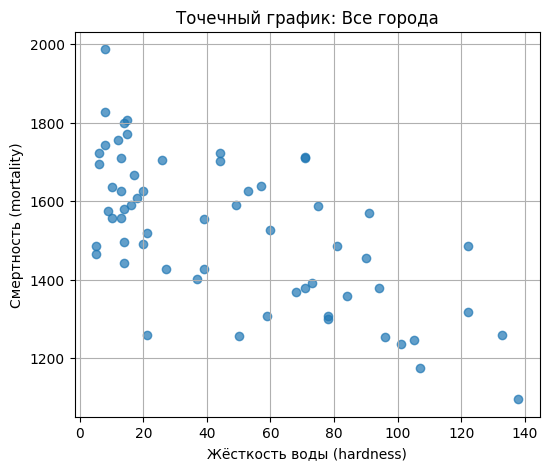


Коэффициент корреляции Пирсона:  -0.655, p-value = 0.000
Коэффициент корреляции Спирмена: -0.632, p-value = 0.000

Параметры линейной регрессии:
  Наклон (коэффициент при hardness): -3.226
  Свободный член (intercept):        1676.356

Коэффициент детерминации R^2: 0.429


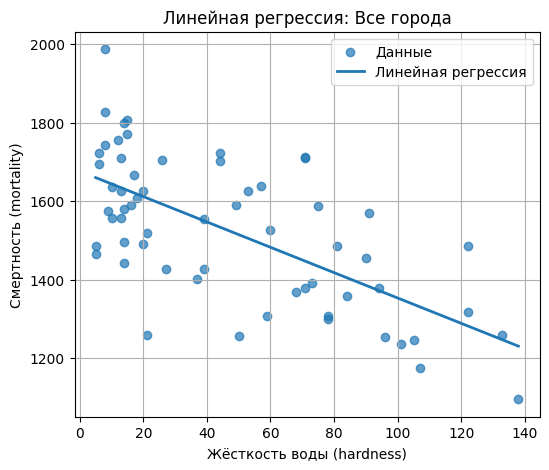

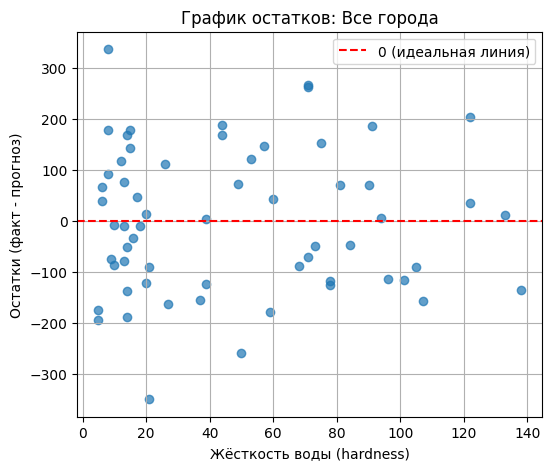


Краткий вывод для Все города:
  Направление связи (по Пирсону): обратная (чем больше жёсткость, тем меньше смертность)
  Обрати внимание также на значение p-value и R^2.

Количество северных городов: 35
Количество южных городов: 26

Анализ для группы: Север (North)


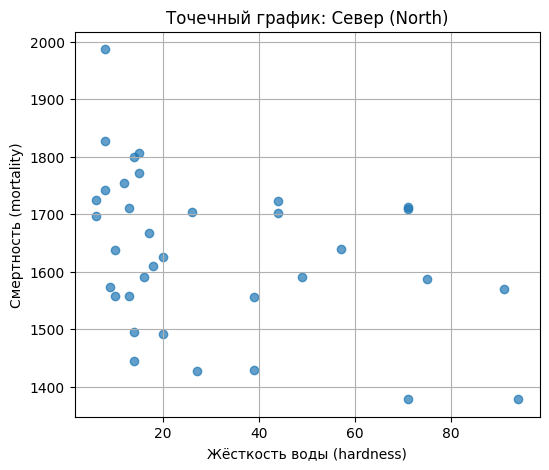


Коэффициент корреляции Пирсона:  -0.369, p-value = 0.029
Коэффициент корреляции Спирмена: -0.404, p-value = 0.016

Параметры линейной регрессии:
  Наклон (коэффициент при hardness): -1.931
  Свободный член (intercept):        1692.313

Коэффициент детерминации R^2: 0.136


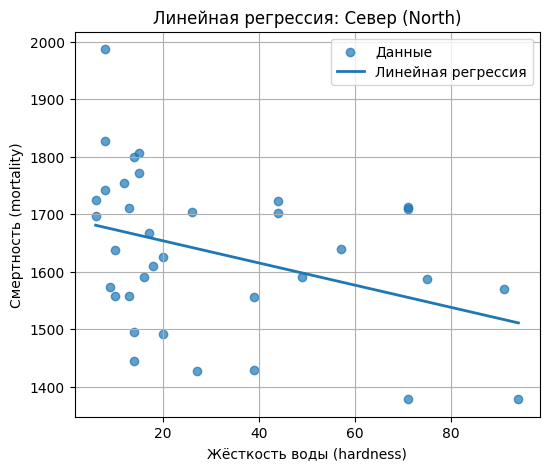

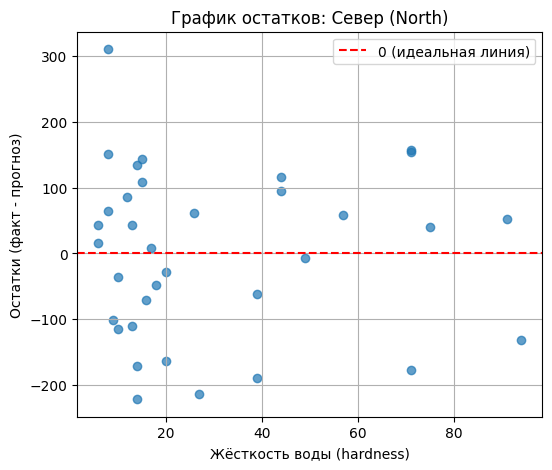


Краткий вывод для Север (North):
  Направление связи (по Пирсону): обратная (чем больше жёсткость, тем меньше смертность)
  Обрати внимание также на значение p-value и R^2.

Анализ для группы: Юг (South)


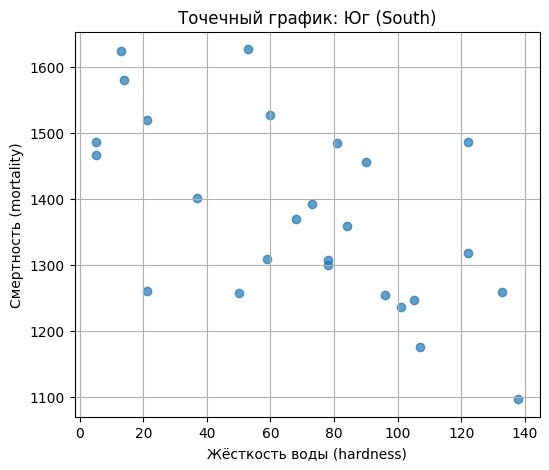


Коэффициент корреляции Пирсона:  -0.602, p-value = 0.001
Коэффициент корреляции Спирмена: -0.596, p-value = 0.001

Параметры линейной регрессии:
  Наклон (коэффициент при hardness): -2.093
  Свободный член (intercept):        1522.815

Коэффициент детерминации R^2: 0.363


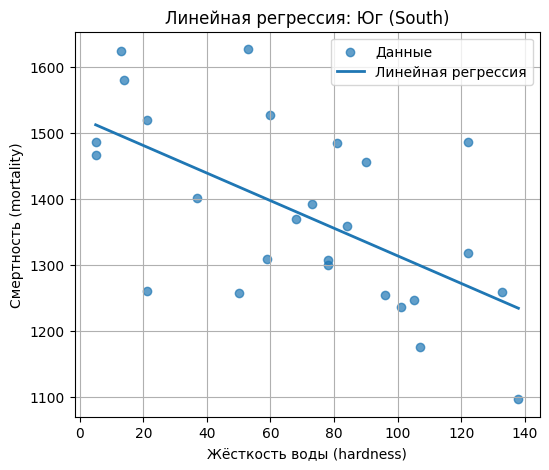

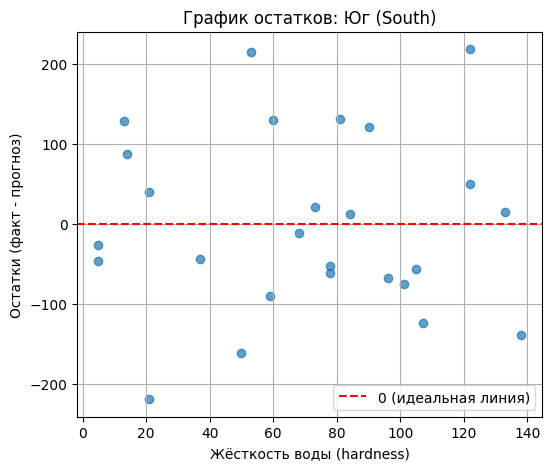


Краткий вывод для Юг (South):
  Направление связи (по Пирсону): обратная (чем больше жёсткость, тем меньше смертность)
  Обрати внимание также на значение p-value и R^2.


In [7]:
# импорттируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# из scipy импортируем функции для расчёта корреляции
from scipy.stats import pearsonr, spearmanr
 
# из sklearn (scikit-learn) берём модель линейной регрессии
from sklearn.linear_model import LinearRegression
 
# а также метрику r2_score (коэффициент детерминации)
from sklearn.metrics import r2_score
 
 
# ЗАГРУЗКА ДАННЫХ
 
# обращаемся к файлу
df = pd.read_csv("water.csv")
 
# Посмотрим на первые несколько строк, чтобы убедиться, что всё прочиталось правильно
print("Первые 5 строк датасета:")
print(df.head())
 
# Посмотрим названия столбцов
print("\nНазвания столбцов:")
print(df.columns)
 
# Если у тебя названия столбцов отличаются от ожидаемых,
# здесь можно их переименовать, например:
# df = df.rename(columns={"Mortality": "mortality", "Hardness": "hardness", "Region": "location"})
 
# Проверим, нет ли пропусков в важных столбцах
print("\nКоличество пропусков в каждом столбце:")
print(df.isna().sum())
 
 
# ============================================
# ВСПОМОГАТЕЛЬНАЯ ФУНКЦИЯ ДЛЯ АНАЛИЗА
# (чтобы не копировать один и тот же код
#  для всей выборки, севера и юга)
# ============================================
 
def analyze_group(data, group_name="Все города"):
    """
    Функция, которая:
    1) Строит точечный график (scatter plot)
    2) Считает корреляции Пирсона и Спирмена
    3) Строит линейную регрессию
    4) Считает коэффициент детерминации (R^2)
    5) Строит график остатков
 
    data — DataFrame с колонками 'hardness' и 'mortality'
    group_name — строка с названием группы (например, 'Все города', 'Север', 'Юг')
    """
 
    print("\n" + "=" * 60)
    print(f"Анализ для группы: {group_name}")
    print("=" * 60)
 

    # 1. Точечный график (scatter plot)

    # По оси X — жёсткость воды (hardness)
    # По оси Y — смертность (mortality)
 
    plt.figure(figsize=(6, 5))
    plt.scatter(data["hardness"], data["mortality"], alpha=0.7)
    plt.xlabel("Жёсткость воды (hardness)")
    plt.ylabel("Смертность (mortality)")
    plt.title(f"Точечный график: {group_name}")
    plt.grid(True)
    plt.show()
 

    # 2. Корреляция Пирсона и Спирмена
 
    # Извлекаем два столбца как массивы чисел
    x = data["hardness"]
    y = data["mortality"]
 
    # корреляция Пирсона: измеряет линейную связь
    pearson_corr, pearson_p = pearsonr(x, y)
 
    # Корреляция Спирмена: измеряет монотонную связь (на основе рангов)
    spearman_corr, spearman_p = spearmanr(x, y)
 
    print(f"\nКоэффициент корреляции Пирсона:  {pearson_corr:.3f}, p-value = {pearson_p:.3f}")
    print(f"Коэффициент корреляции Спирмена: {spearman_corr:.3f}, p-value = {spearman_p:.3f}")
 

    # 3. Линейная регрессия

    # Модель вида: mortality = a * hardness + b
 
    # преобразуем x в столбец
    # Поэтому 
    X = x.values.reshape(-1, 1)  # превращаем в массив формы (n_samples, 1)
    y_values = y.values          # это просто одномерный массив из смертности
 
    # Создаём объект модели
    lin_reg = LinearRegression()
 
    # Обучаем модель на наших данных
    lin_reg.fit(X, y_values)
 
    # Получаем предсказания модели: смертность, которую модель считает на основе жёсткости
    y_pred = lin_reg.predict(X)
 
    # коэффициенты модели
    # coef_ — это наклон прямой (a)
    # intercept_ — это свободный член (b)
    print("\nПараметры линейной регрессии:")
    print(f"  Наклон (коэффициент при hardness): {lin_reg.coef_[0]:.3f}")
    print(f"  Свободный член (intercept):        {lin_reg.intercept_:.3f}")
 

    # 4. Коэффициент детерминации R^2

    # R^2 показывает, какую долю изменчивости смертности объясняет модель.
    # 0 — модель ничего не объясняет,
    # 1 — модель идеально объясняет все данные.
    r2 = r2_score(y_values, y_pred)
    print(f"\nКоэффициент детерминации R^2: {r2:.3f}")
 

    # 5. График линейной регрессии поверх точек

    plt.figure(figsize=(6, 5))
    # Рисуем исходные точки
    plt.scatter(x, y, alpha=0.7, label="Данные")
    # Чтобы линия была красивой, отсортируем X по возрастанию
    sorted_idx = np.argsort(x.values)
    x_sorted = x.values[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    # Рисуем линию регрессии
    plt.plot(x_sorted, y_pred_sorted, label="Линейная регрессия", linewidth=2)
    plt.xlabel("Жёсткость воды (hardness)")
    plt.ylabel("Смертность (mortality)")
    plt.title(f"Линейная регрессия: {group_name}")
    plt.legend()
    plt.grid(True)
    plt.show()
 

    # 6. График остатков

    # Остаток = фактическое значение - предсказанное моделью
    residuals = y_values - y_pred
 
    plt.figure(figsize=(6, 5))
    # рисуем остатки в зависимости от жёсткости воды.
    plt.scatter(x, residuals, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--", label="0 (идеальная линия)")
    plt.xlabel("Жёсткость воды (hardness)")
    plt.ylabel("Остатки (факт - прогноз)")
    plt.title(f"График остатков: {group_name}")
    plt.legend()
    plt.grid(True)
    plt.show()
 

    if pearson_corr > 0:
        direction = "прямая (чем больше жёсткость, тем больше смертность)"
    elif pearson_corr < 0:
        direction = "обратная (чем больше жёсткость, тем меньше смертность)"
    else:
        direction = "связи не видно"
 
    print(f"\nКраткий вывод для {group_name}:")
    print(f"  Направление связи (по Пирсону): {direction}")
    print("  Обрати внимание также на значение p-value и R^2.")
 
 

# ЗАДАНИЕ 1: ВСЕ ГОРОДА ВМЕСТЕ
 
# Для задания 1 мы просто анализируем весь датасет целиком.
analyze_group(df, group_name="Все города")

# ЗАДАНИЕ 2: СЕВЕР И ЮГ ОТДЕЛЬНО
 
# Предполагаем, что в столбце 'location' указано:
# 'North' — северные города
# 'South' — южные города
 
north_df = df[df["location"] == "North"]
south_df = df[df["location"] == "South"]
 
print("\nКоличество северных городов:", len(north_df))
print("Количество южных городов:", len(south_df))
 
# Проверим, что обе выборки не пустые
if len(north_df) > 0:
    analyze_group(north_df, group_name="Север (North)")
else:
    print("В данных нет строк с location == 'North'")
 
if len(south_df) > 0:
    analyze_group(south_df, group_name="Юг (South)")
else:
    print("В данных нет строк с location == 'South'")